## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными - (i) получить их и (ii) обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнем с импорта torch

In [1]:
import torch

Tensor - есть массив (возможно, многомерный) числовых значений. tensor с одной осью называется (в математике) вектором, с двумя - матрицей. Для массивов с более чем двумя осями нет специальных имен - их называют просто тензорами.
Самый простой объект, который мы можем создать - это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Мы можем получить форму экземпляра tensor через свойство shape.

In [3]:
x.shape

torch.Size([12])

Узнать расположен ли он на gpu или cpu можно через специальный аттрибут - device

In [4]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причем количество элементов осталось прежним.

In [5]:
x.view((3,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [6]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [7]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно указав все значения

In [9]:
torch.tensor([[1,2,3], [4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использовает равномерное распределение, второе - нормальное

In [10]:
torch.rand((2,3,4))

tensor([[[0.9336, 0.7239, 0.0195, 0.6197],
         [0.5435, 0.8701, 0.6141, 0.8105],
         [0.8962, 0.4039, 0.7523, 0.4604]],

        [[0.9089, 0.9827, 0.2253, 0.2163],
         [0.7727, 0.5399, 0.7074, 0.3241],
         [0.1149, 0.1877, 0.4431, 0.0745]]])

In [11]:
torch.randn((2,3,4))

tensor([[[ 0.5046,  1.1724,  0.5679, -0.1707],
         [ 0.4522, -1.3316,  2.3525,  0.7257],
         [-1.8191,  0.1546,  0.0315, -1.4943]],

        [[-0.8441, -0.2432,  1.0799,  1.9459],
         [-0.1286,  0.5931, -0.1373, -0.9236],
         [ 1.3428, -1.5857,  0.8802,  0.4471]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов. 

In [14]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [15]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [16]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [17]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [18]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [19]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

Суммирование всех элементов тезора дает тензор с одним элементом.

In [20]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [21]:
x.sum().item()

66

## Broadcast 

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast'а: Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [22]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путем broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [23]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [24]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [25]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Мы так же можем изменять значения в тензоре

In [26]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значение. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [27]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [28]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примениете оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точка (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимся вершинами

In [30]:
a = torch.tensor([[1.,1.], [1.,2.]])
a

tensor([[1., 1.],
        [1., 2.]])

In [31]:
#torch.mm(a, a.T)
# a[0][0]*a[1][1] - a[0][1]*a[1][0]
b = torch.tensor([[2., -1], [-1., 1.]])
torch.mm(a, b)

tensor([[1., 0.],
        [0., 1.]])

In [32]:
a = torch.tensor([[1.,2.], [3.,4.]])
a

tensor([[1., 2.],
        [3., 4.]])

## Детектор спама

In [33]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
#!unzip smsspamcollection.zip

In [34]:
import pandas as pd

In [35]:
df = pd.read_table('SMSSpamCollection', sep='\t', header=None,names=['label', 'sms_message'])

df.head()

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df['label'] = df.label.map({'ham':0,'spam':1})

df.shape

(5572, 2)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train).toarray()
testing_data = count_vector.transform(X_test).toarray()

In [69]:
training_data[0].sum()

24

In [71]:
training_data.shape

(4179, 7456)

In [41]:
training_tensor = torch.Tensor(training_data)
testing_tensor = torch.Tensor(testing_data)

In [86]:
training_tensor.shape

torch.Size([4179, 7456])

In [87]:
training_tensor.max()

tensor(18.)

In [85]:
pd.Series(training_tensor[0]).value_counts()

0.0    7433
1.0      22
2.0       1
dtype: int64

$P(w) = \frac{Количество\ вхождений\ слова\ w\ в\ датасет}{Количество\ слов\ в\ датасете"}$

In [88]:
training_tensor.sum()

tensor(59839.)

In [89]:
p_w = training_tensor.sum(axis=0) / training_tensor.sum()
p_w.shape

torch.Size([7456])

In [91]:
p_w.max()

tensor(0.0279)

$P(w|spam) = \frac{Количество\ вхождений\ слова\ w\ в\ спамные сообщения}{Количество\ слов\ в\ спаме"}$

In [45]:
spam_training_tensor = training_tensor[(y_train == 1).values]

In [46]:
spam_training_tensor.shape

torch.Size([562, 7456])

In [47]:
p_w_spam = spam_training_tensor.sum(axis=0) / spam_training_tensor.sum()
p_w_spam.shape

torch.Size([7456])

$P(spam) = \frac{Количество\ спама}{Количество\ сообщений"}$

In [48]:
p_spam = (y_train == 1).values.sum() / len(y_train)
p_not_spam = (y_train == 0).values.sum() / len(y_train)

In [49]:
p_spam

0.13448193347690834

In [50]:
p_not_spam

0.8655180665230916

$P(spam|w)=\frac{P(w|spam)P(spam)}{P(w)}$

$P(spam|w)=\frac{P(w_1|spam)P(w_2|spam)...P(w_n|spam)P(spam)}{P(w_1)P(w_2)...P(w_n)}$

In [51]:
test_sample = testing_tensor[0]

In [52]:
y_test.head()

1078    0
4028    0
958     0
4642    0
4674    0
Name: label, dtype: int64

In [53]:
df.iloc[1078]

label                                     0
sms_message    Yep, by the pretty sculpture
Name: 1078, dtype: object

In [54]:
[test_sample != 0]

[tensor([False, False, False,  ..., False, False, False])]

In [55]:
(test_sample * p_w_spam)[test_sample != 0]

tensor([0.0021, 0.0000, 0.0119, 0.0000])

In [56]:
(test_sample * p_w_spam)[test_sample != 0].prod()

tensor(0.)

In [57]:
(test_sample * p_w_spam)[test_sample != 0].prod() * p_spam

tensor(0.)

In [58]:
((test_sample * p_w)[test_sample != 0].prod())

tensor(1.1332e-12)

In [59]:
(test_sample * p_w_spam)[test_sample != 0].prod() * p_spam / ((test_sample * p_w)[test_sample != 0].prod())

tensor(0.)

## Вероятности

In [60]:
# Равномерное распределение вероятности

In [61]:
torch.rand(10)

tensor([0.8889, 0.1530, 0.5373, 0.2649, 0.0485, 0.7693, 0.2333, 0.9993, 0.5602,
        0.9352])

In [62]:
## Нормальное распределение

In [63]:
torch.randn(10)

tensor([-0.8035, -0.5497,  0.9221, -1.5544, -0.2675, -1.4758, -1.9105, -0.2138,
        -1.4080,  1.4747])

In [64]:
## Равномерное на целых числах

In [65]:
torch.randint(0, 10, (10,))

tensor([4, 2, 5, 6, 4, 5, 4, 3, 7, 3])

## Постройте график плотности для нормального распределения

In [66]:
import seaborn as sns

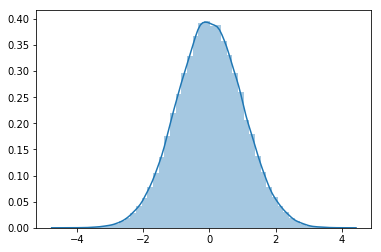

In [67]:
sns.distplot(torch.randn(100000))